<a href="https://colab.research.google.com/github/ADATYA/Code_Alpha_Internship-_Task-Folder/blob/main/Copy_Of_Spotify_Song_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Set/SpotifyFeatures.csv/SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [9]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
duration            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   energy            232725 non-null  float64
 8   instrumentalness  232725 non-null  float64
 9   key               232725 non-null  object 
 10  liveness          232725 non-null  float64
 11  loudness          232725 non-null  float64
 12  mode              232725 non-null  object 
 13  speechiness       232725 non-null  float64
 14  tempo             232725 non-null  float64
 15  time_signature    232725 non-null  object 
 16  valence           23

In [11]:
sorted_df=df.sort_values("popularity", ascending=True)
sorted_df.head(20)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611000,0.389,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,99
74954,Children's Music,Sing n Play,"See, See My Playmate",3WaCwwpGoxLEkFmd6cpZO5,0,0.139000,0.556,0.4390,0.006400,D,0.1720,-11.604,Major,0.0288,165.306,4/4,0.820,150
74958,Children's Music,Children Songs Company,By the God - Instrumental,5yDehr9ccZo3vBO8hZXFcK,0,0.213000,0.736,0.4460,0.821000,D,0.2980,-12.328,Major,0.0504,130.011,4/4,0.668,213
74959,Children's Music,Children Songs Company,Interruption Please - Instrumental,6NEULw7AmTOAYRunPWcFvn,0,0.013100,0.639,0.8440,0.095700,A#,0.0399,-8.582,Minor,0.0439,120.027,4/4,0.271,184
74961,Children's Music,Children Songs Company,Breeze,6v126eNn1A79yFIKGfvqLz,0,0.028000,0.607,0.5540,0.000000,A,0.1690,-10.571,Major,0.3710,92.193,4/4,0.404,148
74962,Children's Music,Children Songs Company,Woodland,7qR2PWbDeuhh1Vzd0anb25,0,0.995000,0.529,0.1540,0.414000,B,0.1230,-9.222,Minor,0.0470,69.588,4/4,0.332,266
74963,Children's Music,Children Songs Company,Cool Me - Instrumental,0V3Q9RYUaiLKTJIvg4KCST,0,0.250000,0.623,0.4710,0.931000,A#,0.2580,-8.675,Major,0.0332,120.015,4/4,0.515,350
74964,Children's Music,Sing n Play,The Tortoise and the Hare,0oX193rf5y87RipsZnH8Pq,0,0.496000,0.563,0.3460,0.000000,D,0.1200,-14.058,Major,0.0938,144.642,4/4,0.370,201
56153,Movie,Bruno Pelletier,Lié par le sang,3GO9Wo14FvMXvOKE4LItjg,0,0.029400,0.656,0.6940,0.000017,A,0.0527,-6.755,Major,0.0273,120.085,4/4,0.449,276
74966,Children's Music,Children Songs Company,Forsaken,1rRNU87xfqvxiUsEXXyi8k,0,0.994000,0.429,0.0382,0.000000,B,0.4480,-12.704,Major,0.0557,156.807,3/4,0.474,129


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903
valence,232725.0,0.454917,0.260065,0.00000,0.2370,0.444000,0.6600,1.000


In [16]:
popularity_df=df.query("popularity>20", inplace=False).sort_values("popularity", ascending=False)
popularity_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,179
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,179
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,190
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,150
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,190


In [21]:
print(df.columns)
if 'genre' in df.columns:
    df.set_index("genre", inplace=True)
    df.index=pd.to_datetime(df.index)
    print(df.head())
else:
    print("The 'genre' column does not exist in the DataFrame.")

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'duration'],
      dtype='object')
The 'genre' column does not exist in the DataFrame.


In [3]:
df[["artist_name"]].iloc[18]

artist_name    Henri Salvador
Name: 18, dtype: object

In [4]:
#converting milisecond to second
df["duration"]= df["duration_ms"].apply(lambda x: round(x/1000))
df.drop("duration_ms", inplace=True, axis=1)

In [5]:
df.duration.head()

0     99
1    137
2    170
3    152
4     83
Name: duration, dtype: int64

False
Column 'explicit' not found. Check for typos or if it was removed previously.


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'acousticness'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'liveness'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'duration')]

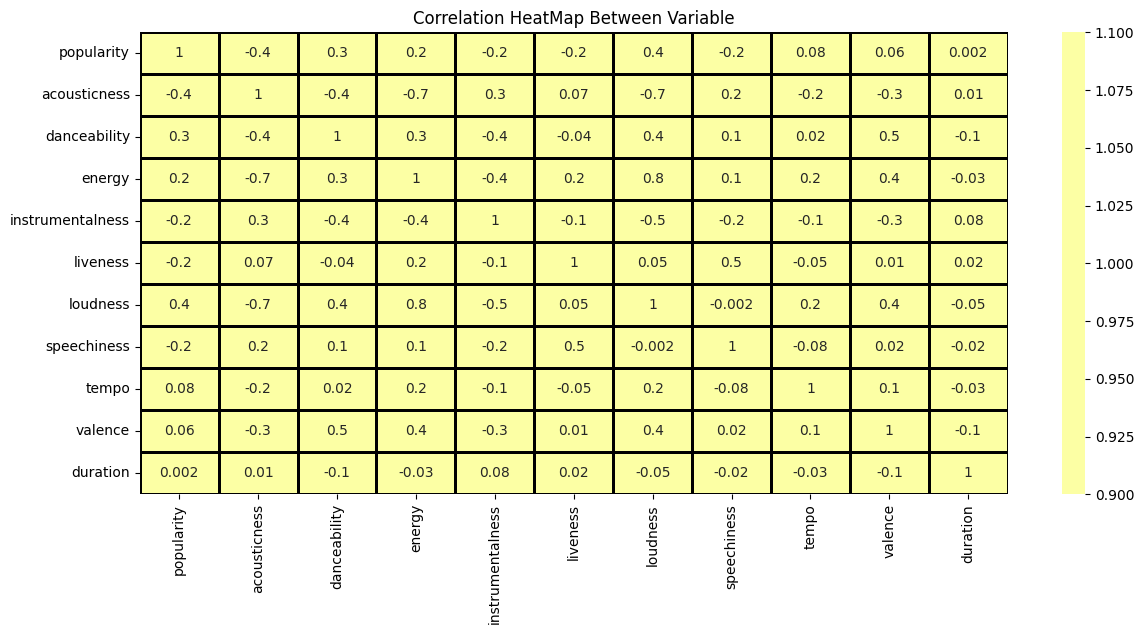

In [24]:
# Check if 'explicit' column exists
print('explicit' in df.columns)

# If it doesn't exist, check for typos or review previous steps
# If it does exist, proceed with the correlation calculation
if 'explicit' in df.columns:
    # Select only numerical columns for correlation
    numerical_df = df.select_dtypes(include=['number'])  # Select numerical columns
    corr_df = numerical_df.drop(["key", "mode", "explicit"], axis=1, errors='ignore').corr(method="pearson")
    # errors='ignore' handles cases where a column to drop doesn't exist
else:
    print("Column 'explicit' not found. Check for typos or if it was removed previously.")
    # Handle the case where 'explicit' is missing, e.g., skip the correlation or use a different subset of columns
    numerical_df = df.select_dtypes(include=['number'])  # Select numerical columns
    corr_df = numerical_df.drop(["key", "mode"], axis=1, errors='ignore').corr(method="pearson")  # Example: drop only "key" and "mode"

plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(
    corr_df,
    annot=True,
    fmt=".1g",
    vmin=1,
    vmax=1,
    center=0,
    cmap="inferno",
    linewidths=1,
    linecolor="Black",
)
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [33]:
sample_df=df.sample(int(0.004*len(df)))

In [31]:
print(len(sample_df))

930


[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

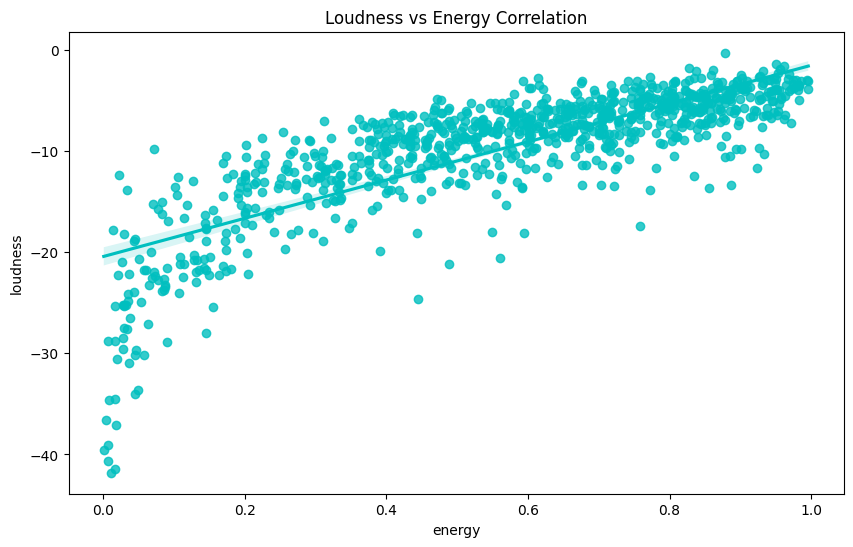

In [36]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y="loudness", x="energy", color="c").set(title="Loudness vs Energy Correlation")

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

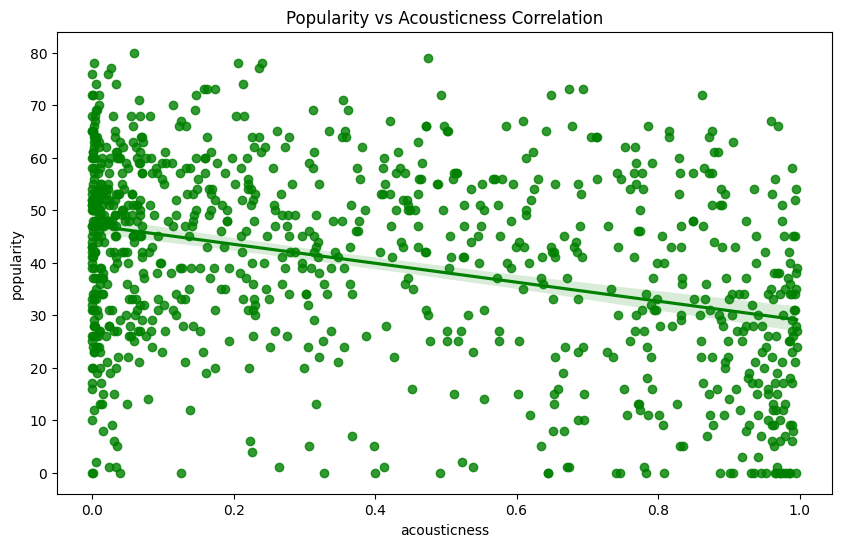

In [37]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y="popularity", x="acousticness", color="g").set(title="Popularity vs Acousticness Correlation")

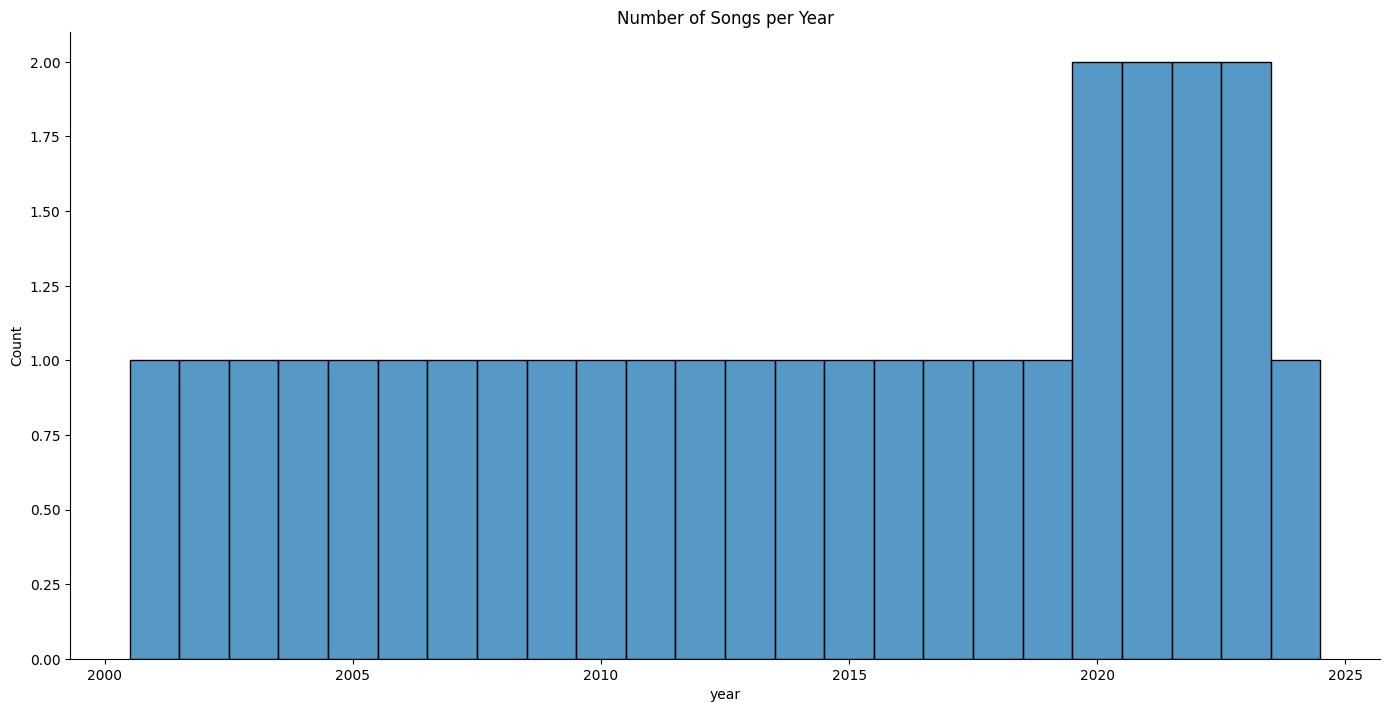

In [10]:
!pip install seaborn
import seaborn as sns
import pandas as pd

# Create a sample DataFrame (replace this with your actual data)
data = {'year': [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020, 2021, 2022, 2023, 2020, 2021, 2022,2023,2024]}
df = pd.DataFrame(data)

years = df['year']

sns.displot(years, discrete=True, aspect=2, height=7, kind="hist").set(title="Number of Songs per Year")

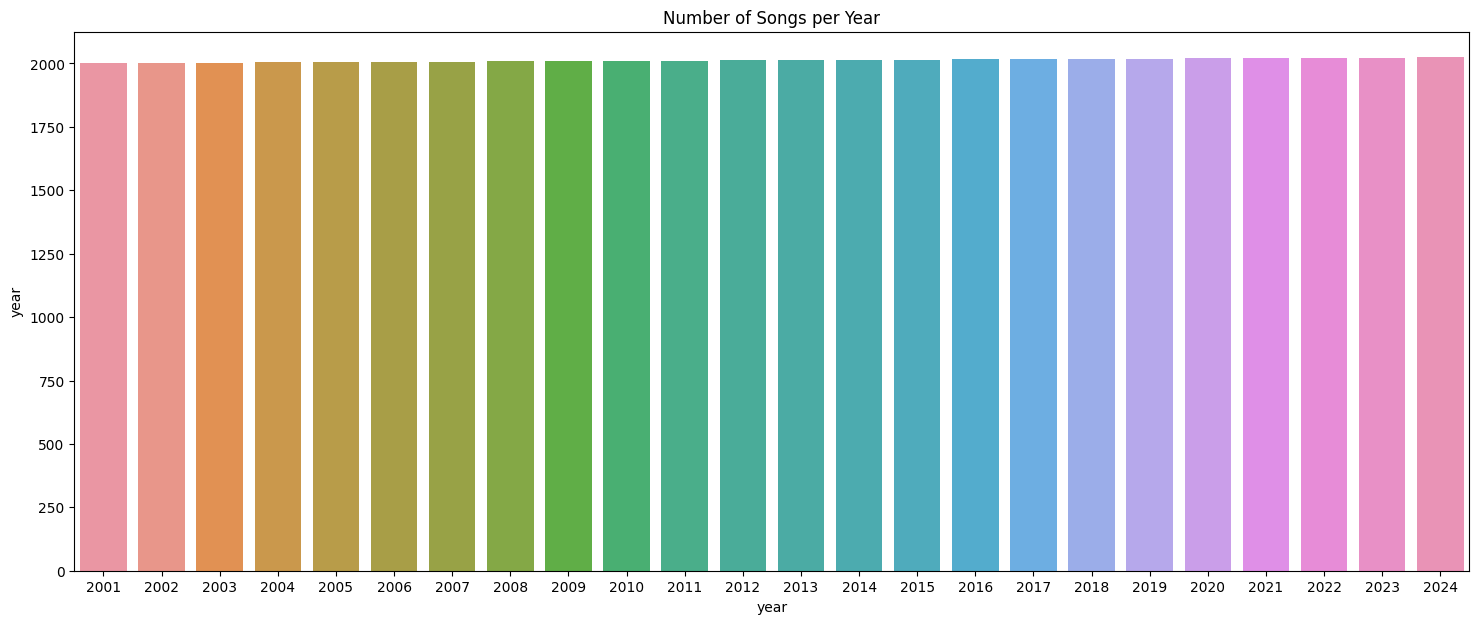

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt # Import the matplotlib library

total_dr = df['year']  # Access the 'year' column instead of 'duration_ms'
fig_dims = (18, 7)
fig, ax = plt.subplots(figsize=fig_dims)
# Use 'year' for both x and y since 'duration_ms' is not available
fig = sns.barplot(x=df['year'], y=df['year'], ax=ax, errwidth=False).set(title="Number of Songs per Year")

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025., 2030.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025'),
  Text(2030.0, 0, '2030')])

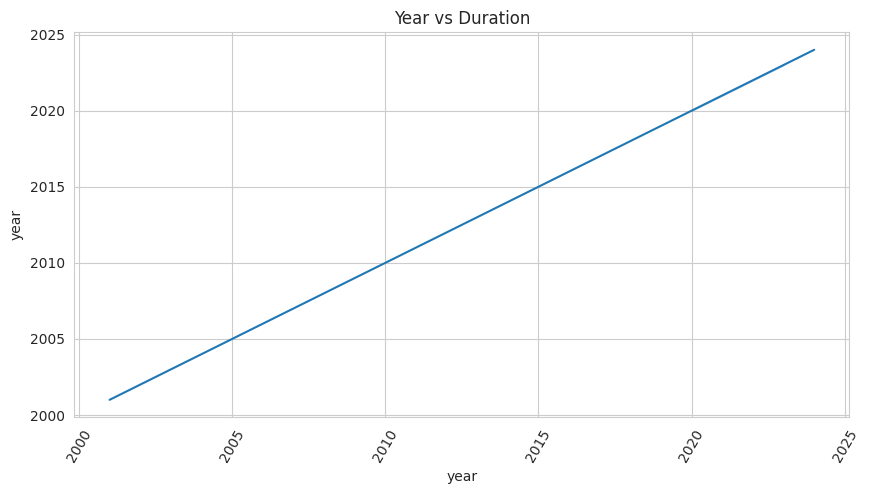

In [21]:
total_dr=df['year']  # Replace 'duration' with 'year'
sns.set_style(style="whitegrid")
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.lineplot(x=df.year, y=total_dr, ax=ax).set(title="Year vs Duration")
plt.xticks(rotation=60)

Error: 'duration_ms' column is missing or not numeric.


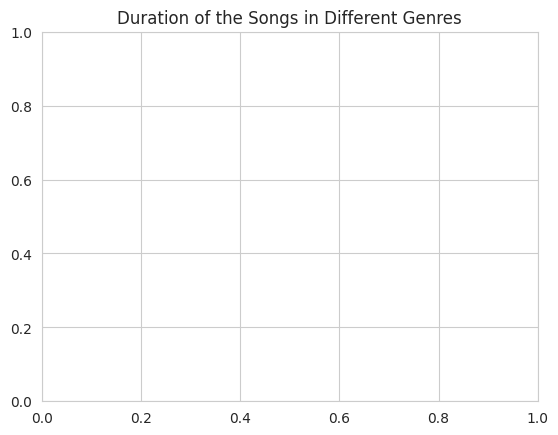

In [25]:
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket", as_cmap=True)

# Verify 'duration_ms' exists and is numeric
if 'duration_ms' in df.columns and pd.api.types.is_numeric_dtype(df['duration_ms']):
    sns.barplot(y='genre', x='duration_ms', data=total_df)
    plt.xlabel("Duration in milli second")
    plt.ylabel("Genres")
else:
    print("Error: 'duration_ms' column is missing or not numeric.")

Conclusion: The conclusion of this project is Spotify, A store of songs and we are using it to present some classes and some columns to analyse the data value and gain information from this project.
Overall all the projects are quite good to represent the value of analysis EDA in the dataset of Spotify analysis.  